# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.123845e+01     6.484114e+00
 * time: 0.005204916000366211
     1     2.705437e+01     5.103435e+00
 * time: 0.015300989151000977
     2     2.207105e+01     8.712150e+00
 * time: 0.03915905952453613
     3     1.258599e+01     1.971650e+00
 * time: 0.07076096534729004
     4     1.128230e+01     2.758171e+00
 * time: 0.09238290786743164
     5     1.036599e+01     1.731653e+00
 * time: 0.11888003349304199
     6     9.638619e+00     2.458953e+00
 * time: 0.13874506950378418
     7     8.948898e+00     1.123407e+00
 * time: 0.158005952835083
     8     8.594070e+00     7.731006e-01
 * time: 0.17667603492736816
     9     8.415476e+00     5.507329e-01
 * time: 0.19538593292236328
    10     8.312893e+00     4.526475e-01
 * time: 0.21367692947387695
    11     8.264565e+00     4.422589e-01
 * time: 0.22757387161254883
    12     8.213223e+00     2.971429e-01
 * time: 0.24146604537963867
    13     8.191837e+00     2.165642e-01
 * time:

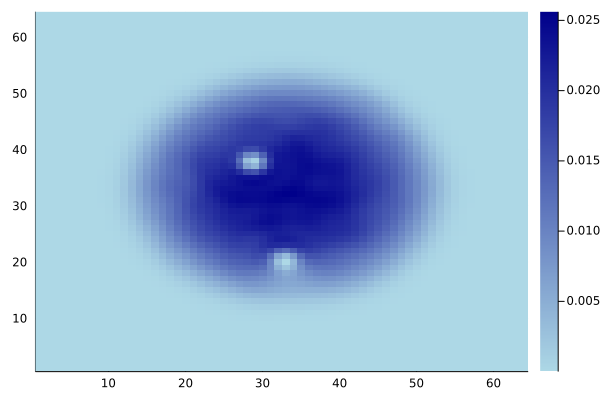

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)